# Syriatel Mobile Telecom
## Predicting Customer Churn using...

Author: Elsie Ochieng

## Overview

## Business Understanding

## Data Understanding

Summary of Features in the Datset

- **State:** The state the customer lives in
- **Account Length:** Period that the customer has had an account in days.
- **Area Code:** The area code of the customer
- **Phone Number:** The phone number of the customer
- **International Plan:** True if the customer has the international plan, otherwise false.
- **Voice Mail Plan:** True if the customer has the voice mail plan, otherwise false.
- **Number Vmail Messages:** the number of voicemails sent by the customer.
- **Total Day Minutes:** total number of minutes the customer has been in calls during the day.
- **Total Day Calls:** total number of calls the user has done during the day.
- **Total Day Charge:** total amount of money the customer was charged by the Telecom company for calls during the day.
- **Total Eve Minutes:** total number of minutes the customer has been in calls during the evening.
- **Total Eve Calls:** total number of calls the customer has done during the evening.
- **Total Eve Charge:** total amount of money the customer was charged by the Telecom company for calls during the evening.
- **Total Night Minutes:** total number of minutes the customer has been in calls during the night.
- **Total Night Calls:** total number of calls the customer has done during the night.
- **Total Night Charge:** total amount of money the customer was charged by the Telecom company for calls during the night.
- **Total Intl Minutes:** total number of minutes the user has been in international calls.
- **Total Intl Calls:** total number of international calls the customer has done.
- **Total Intl Charge:** total amount of money the customer was charged by the Telecom company for international calls.
- **Customer Service Calls:** number of calls the customer has made to customer service.
- **Churn:** true if the customer terminated their contract, otherwise false

## Data Preparation

The first step in data preparation was loading the dataset and doing a preview of the data to see how many records are in the data.

In [31]:
#Import relevant packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt  
# import category_encoders as ce
import warnings     
import datetime as dt
# import dataframe_image as dfi
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv('data/telecom_customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the quick overview of each column it appears that there are no columns with null values. This will however require further investigation into each to identify if there are any errors or inconsistencies. It was also noted that the column names are not in the best format and need to be changed.

In [4]:
# Formatting column names to remove whitespaces
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [5]:
# Format phone number column to convert o number and remove hyphen
df['phone_number'] = df['phone_number'].str.replace('-', '', regex=True).astype(int)

In [6]:
df.nunique()

state                       51
account_length             212
area_code                    3
phone_number              3333
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_day_minutes         1667
total_day_calls            119
total_day_charge          1667
total_eve_minutes         1611
total_eve_calls            123
total_eve_charge          1440
total_night_minutes       1591
total_night_calls          120
total_night_charge         933
total_intl_minutes         162
total_intl_calls            21
total_intl_charge          162
customer_service_calls      10
churn                        2
dtype: int64

There are several columns with a high number of unique values such as those detailng the total number of minutes the customer has been in calls and charge. this could be an indicator of outliers and further EDA is required for those columns. The Phone number column contains the phone numbers of each customer and each needs to be a unique value as no 2 customers share numbers. This is evident as there are 3333 unique numbers in the column which makes the column a unique identifier.

#### Checking for Missing and Duplicate values

In [7]:
# Check for missing values
missing = df.isna().sum()
print(missing)

# Check for duplicates
duplicates = len(df[df.duplicated()])
print(' ')
print('Dupicated Values:', duplicates)

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64
 
Dupicated Values: 0


The data contains no missing values and no duplicates either. 

The target column which is churn does not appear to have any inconcistencies 

## Exploratory Data Analysis

### Univariate Analysis

First column to be looked into was the target column/ dependend variable i.e. 'Churn'.

In [8]:
# Check unique values in 'churn'
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

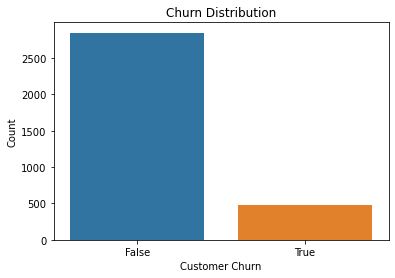

In [9]:
# Cretae a histogram for the target column to help visualize distribution
sns. countplot(x='churn', data=df)

plt.xlabel('Customer Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

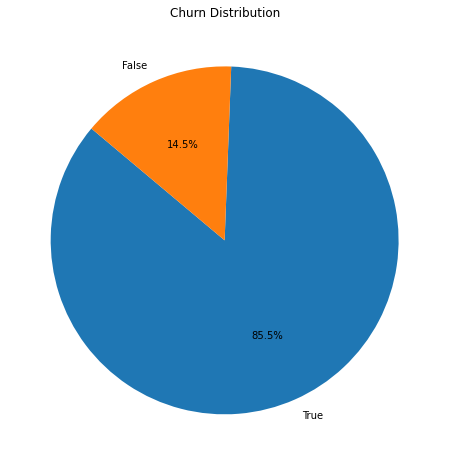

In [10]:
# Count the number of True (churned) and False (non-churned) values in the 'churn' column
churn_counts = df['churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['True', 'False'], autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.show()

The pie chart shows that only 14.5% of the customers have churned while 85.5% did not. The number of customers who did not leave as represented by 'False' in the data is significantly higher than those who did. There is class imbalance that will need to be looked into. Let us analyze other features....

In [11]:
# Check summary statistics
df.describe()

,account_length,area_code,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,2.746626e+05,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,4.229964e+06,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


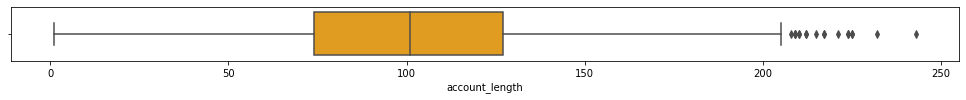

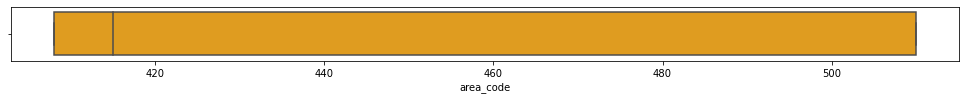

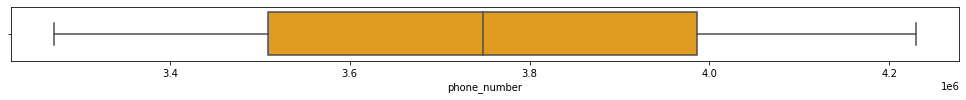

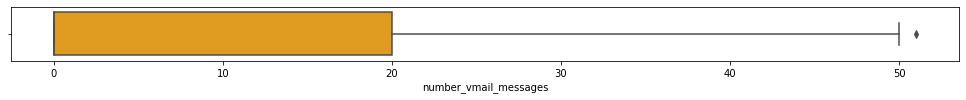

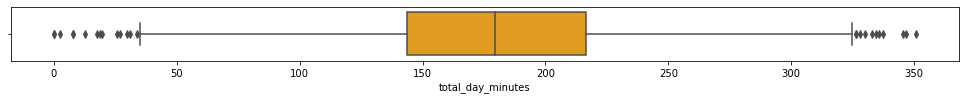

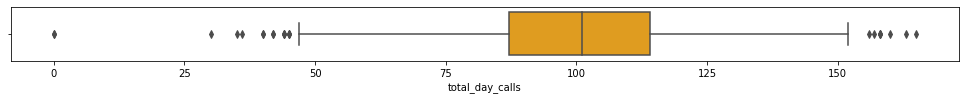

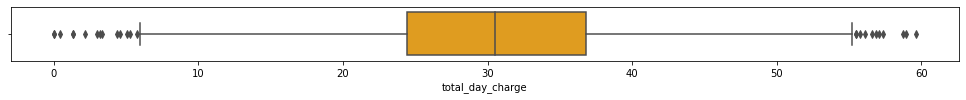

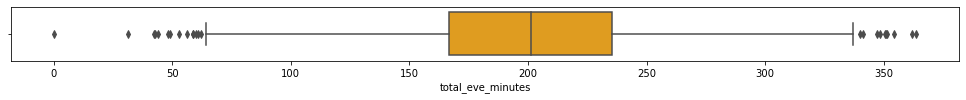

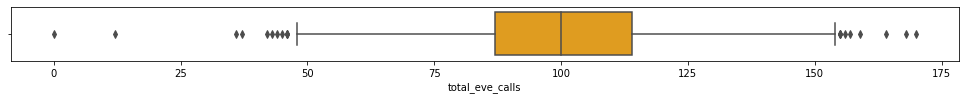

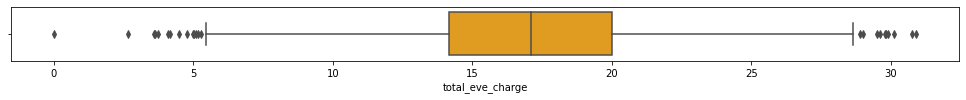

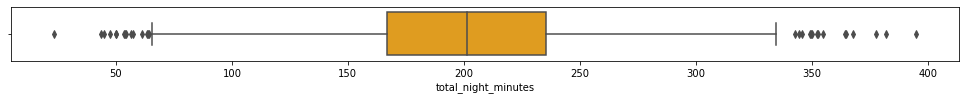

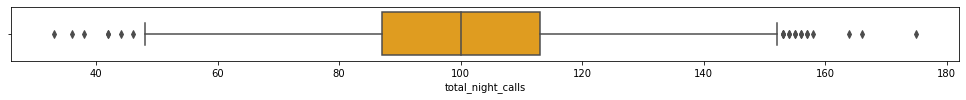

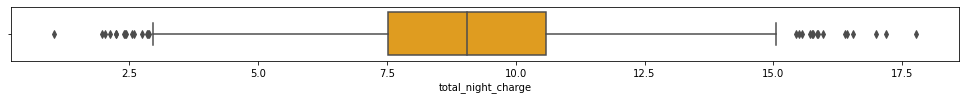

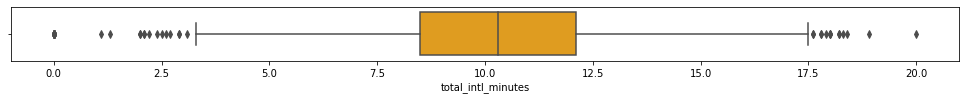

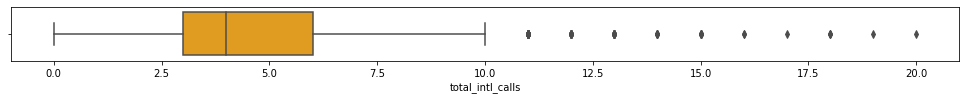

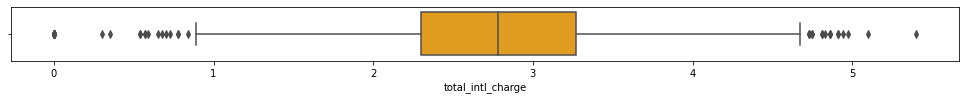

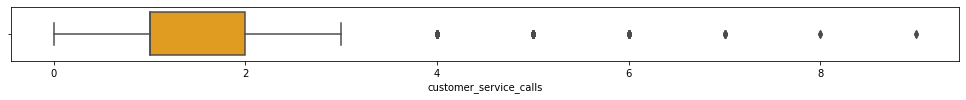

In [12]:


# large_scale_features = ['account_length','total_day_minutes','total_day_calls','total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls']
# small_scale_features = ['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# # Create subplots
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# # Create box plots for each group of features
# sns.boxplot(data=df[small_scale_features], ax=axes[0])
# axes[0].set_title("Small Scale Features")

# sns.boxplot(data=df[large_scale_features], ax=axes[1])
# axes[1].set_title("Large Scale Features")

# Create a box plot for each numerical column in the dataset
numerical = df.select_dtypes(exclude=['object', 'bool'])

for column in numerical:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=numerical, x=column, color='orange')
# # Rotate x-axis labels by 90 degrees for both subplots
# for ax in axes:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# plt.tight_layout()
plt.show()

In [13]:
# # # Create a grid of 2 columns
# # fig, axes = plt.subplots(nrows=len(numerical.columns) // 2, ncols=2, figsize=(12, 20))
# # # fig, axes = plt.subplots(nrows=numerical.columns, ncols=2, figsize=(12, 20))
# # # Plot a histogram for each numerical column
# # for i, column in enumerate(numerical):
# #     ax = axes[i // 2, i % 2]
# #     sns.histplot(data=df, x=column, color='blue', kde=True, ax=ax)

# # # Customize the plot
# # fig.suptitle("Histograms for Numerical Columns")
# # plt.tight_layout()
# # plt.show()

# # Calculate the number of rows and columns needed based on the number of numerical columns
# num_rows = len(numerical) // 2
# num_cols = 2

# # Create a grid of subplots
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

# # Plot a histogram for each numerical column
# for i, column in enumerate(numerical):
#     ax = axes[i // num_cols, i % 2]
#     sns.histplot(data=df, x=column, color='blue', kde=True, ax=ax)

# # Customize the plot
# fig.suptitle("Histograms for Numerical Columns")
# plt.tight_layout()
# plt.show()

### Bivariate Analysis

#### States

In [14]:
# import plotly.express as px
# # Create a choropleth map of the USA using the states column
# fig = px.choropleth(
#     data_frame=df,
#     locations="state",
#     geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson/cb_2018_us_state_elections.geojson",
#     color="account_length",
#     hover_name="state",
#     color_continuous_scale="Viridis",
#     title="Churn Rate by State",
# )

# # Show the choropleth map
# fig.show()


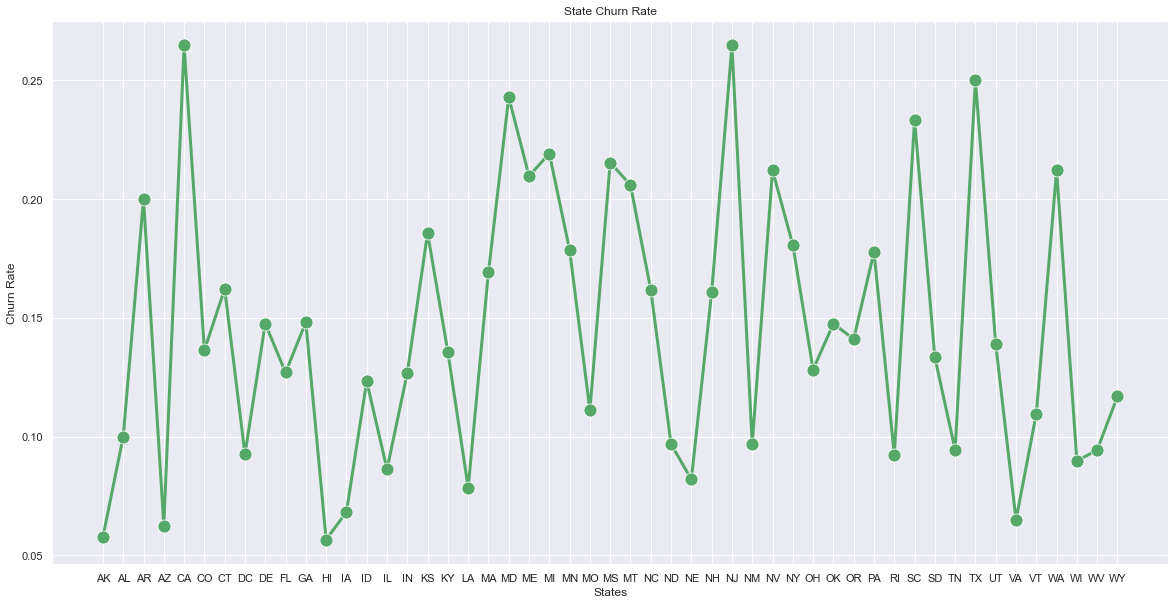

In [15]:
# Group the data by 'state' and calculate the mean churn rate
state_churn = df.groupby('state')['churn'].mean().reset_index()

# Set the figure size using Seaborn
sns.set(rc={'figure.figsize': (20, 10)})

# Create a lineplot with Seaborn
sns.lineplot(x='state', y='churn', data=state_churn, color='g', marker='o', markersize=13, linewidth=3)

# Set title and labels
plt.title('State Churn Rate')
plt.xlabel('States')
plt.ylabel('Churn Rate')

plt.show()

From this we can see which states had the highest churn rate and which ones had the lowest rate of churn. CA, NJ, TX, MD and SC are the top 5 with the highest rate of churn while AK, AZ, HI and VA have some of the lowest rates of churn.

#### Account length

<AxesSubplot:xlabel='account_length', ylabel='count'>

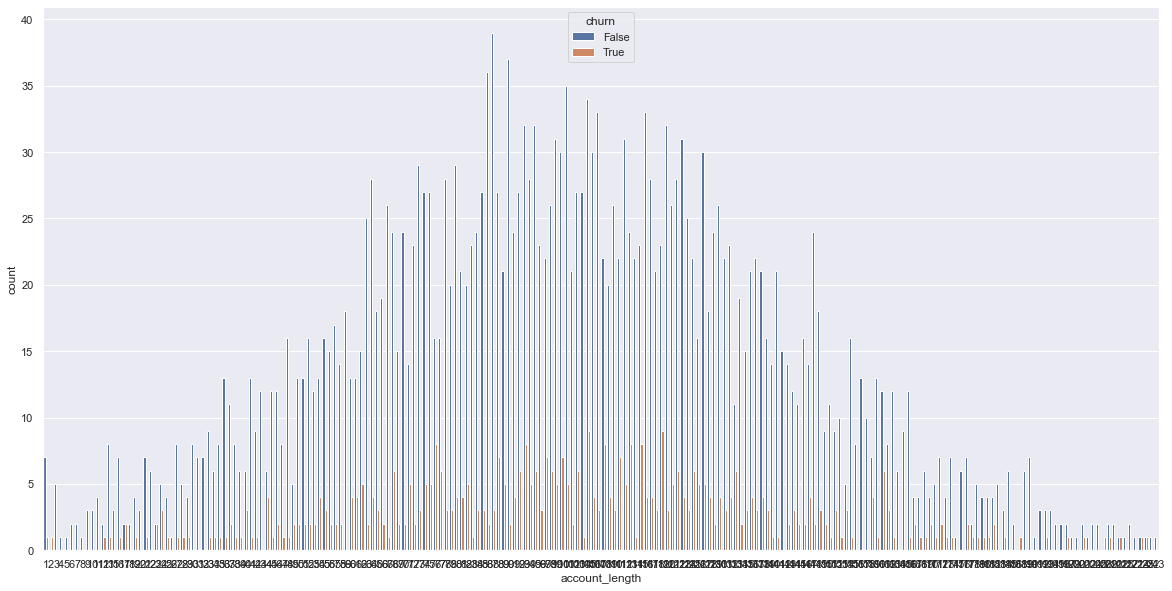

In [16]:
# Analyse churn by account length
sns.countplot(data=df, x='account_length', hue='churn')

### Multivariate Analysis

Multivariate analysis  involves  examining the relationships between multiple variables in a dataset to uncover patterns and associations between those variables. In this case of customer churn analysis,I applied it to gain a deeper understanding of how different factors are related to customer churn.


In [17]:
# Calculate correlations
df_corr = df.corr()
df_corr['churn'].sort_values(ascending=False)


churn                     1.000000
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
phone_number              0.005730
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
Name: churn, dtype: float64

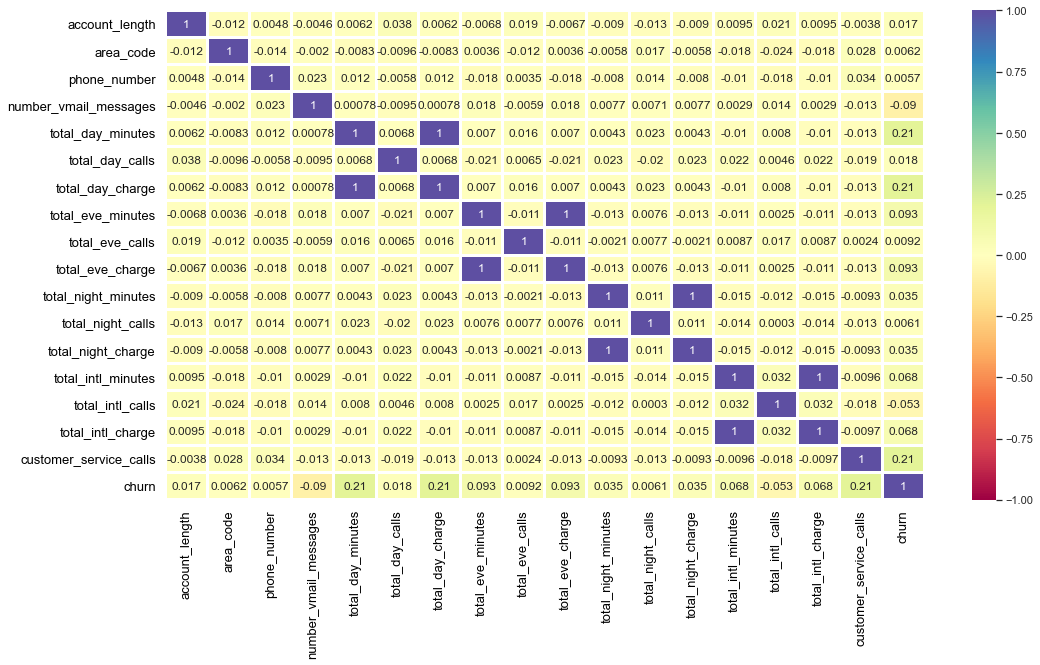

In [18]:
# Create a correlation map
plt.figure(figsize=(17,9))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot=True, linewidths= 2, cmap = "Spectral")
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)
plt.show()

Correlation between the following columns is 1 pointing to them having a perfect positive linear relationship:
- total_day_minutes and total_day_charge
- total_evening_minutes and total_evening_charge
- total_night_minutes and total_night_charge
- total_intl_minutes and total_intl_charge

This means that as the value of minutes spent on calls increases, the amount of money the customer was charged by the company also increases by a fixed amount. Indicating a direct and constant proportionality between the two variables.
This makes the pairs highly redundant and only one of each is required.

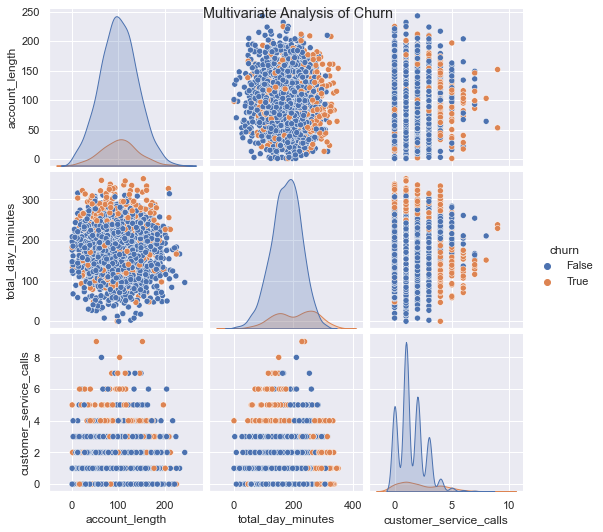

In [19]:
# Create a pair plot to visualize relationships between variables
sns.pairplot(df, hue='churn', vars=['account_length', 'total_day_minutes', 'customer_service_calls'])

# Customize the plot
plt.suptitle("Multivariate Analysis of Churn")
plt.show()

### Data Preprocessing for Modelling

In [20]:
# df.head(20)
# df.info()

In [21]:
# Drop columns not being used
columns_to_drop = ['state', 'total_day_charge','total_eve_charge', 'total_night_charge', 'total_intl_charge' ]
final_df = df.drop(columns=columns_to_drop, axis=1)

In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   phone_number            3333 non-null   int32  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_night_minutes     3333 non-null   float64
 11  total_night_calls       3333 non-null   int64  
 12  total_intl_minutes      3333 non-null   float64
 13  total_intl_calls        3333 non-null   int64  
 14  customer_service_calls  3333 non-null   

Next step is to convers all data types to numeric datatypes. The columns in question are international_plan, voice_mail_plan and churn. We also convert area code because...

In [23]:
#convert churn values to integer 1s and 0s
final_df['churn'] = final_df['churn'].astype(int)

#convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
final_df = pd.get_dummies(final_df, columns=['area_code', 'international_plan', 'voice_mail_plan'])

In [24]:
# Check datatypes
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   phone_number            3333 non-null   int32  
 2   number_vmail_messages   3333 non-null   int64  
 3   total_day_minutes       3333 non-null   float64
 4   total_day_calls         3333 non-null   int64  
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_night_minutes     3333 non-null   float64
 8   total_night_calls       3333 non-null   int64  
 9   total_intl_minutes      3333 non-null   float64
 10  total_intl_calls        3333 non-null   int64  
 11  customer_service_calls  3333 non-null   int64  
 12  churn                   3333 non-null   int32  
 13  area_code_408           3333 non-null   uint8  
 14  area_code_415           3333 non-null   

The output shows that each column has been transformed into a numerical datatype succesfully. The following step is to separate the dependent and independent variables and conducting a train test split to divide the data into training and test data.

Also need to standardize the data so that it is on the same scale and handle class imbalance in the target column because Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

In [25]:
y = final_df['churn']
X = final_df.drop(['churn'], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Instantiate MinMax Scaler
scaler = StandardScaler()

# Fit and transform using scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
y.value_counts()

0    566
1    101
Name: churn, dtype: int64

In [37]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    2284
0    2284
Name: churn, dtype: int64


## Modelling
 ### 1. Logistic Regression(Baseline model)

In [60]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model on the scaled and resampled data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict churn for train and test sets
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Print test scores
print('F1 score:', f1_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Precision score:', precision_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))

print('Accuracy on training set', logreg.score(X_train_resampled, y_train_resampled))



F1 score: 0.5032679738562091
Recall score: 0.7623762376237624
Precision score: 0.375609756097561
Accuracy score: 0.7721139430284858
Accuracy on training set 0.7736427320490368


In [43]:
# Print the classification report for test data
print("Test data Classification Report:")
print(classification_report(y_test, y_test_pred))

Test data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       566
           1       0.38      0.76      0.50       101

    accuracy                           0.77       667
   macro avg       0.66      0.77      0.68       667
weighted avg       0.86      0.77      0.80       667



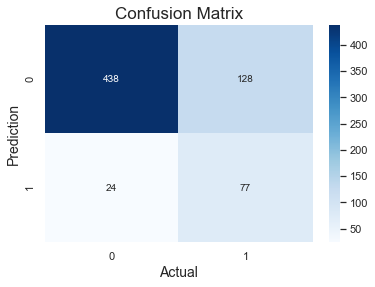

In [50]:
# Calculate the confusion matrix using true predicted labels
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Prediction',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

- True Positives(TP): Model correctly predicted 77 samples as churned(1)
- True Negatives(TN): Model correctly predicted 438 samples as not churned(0)
- False Positives(FP): Model incorrectly predicted 24 samples as churned(1)
- False Negatives(FN): Model incorrectly predicted 128 samples as churned(1)

Overall performance of the model is good with a test accuracy of 77% This is relatively good score.
 - **Accuracy:**
An accuracy of 0.772 indicates that the model correctly predicts approximately 77.2% of all instances suggesting that the model performs well in terms of overall correct predictions

- **Recall:**
Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances. A value of 76.2% is relatively high, indicating that the model is good at identifying positive cases (churned customers).

- **Precision:**
Precision measures the model's ability to make correct positive predictions. A value of 37.6% is relatively low, suggesting that the model makes many false positive predictions (predicts churn when it's not the case)

- **F1-Score:**
F1-score is a measure that balances recall and precision as it represents the harmonic mean of those two metrics. The score of 0.503 indicates a moderate balance between precision and recall. It suggests that the model can make accurate predictions for some instances, but it misses many true positives (as indicated by a relatively low recall).

 

 .

The model shows room for improvement

### 3. Decision Tree

In [59]:
# Initialize the Decision Tree model
dst_model = DecisionTreeClassifier()

# Fit the model on the scaled and resampled data
dst_model.fit(X_train_resampled, y_train_resampled)

# Predict for train and test sets
y_train_pred_dt = dst_model.predict(X_train_scaled)
y_test_pred_dt = dst_model.predict(X_test_scaled)

# Print test scores
print('F1 score:', f1_score(y_test, y_test_pred_dt))
print('Recall score:', recall_score(y_test, y_test_pred_dt))
print('Precision score:', precision_score(y_test, y_test_pred_dt))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_dt))

print('Accuracy on training set', dst_model.score(X_train_resampled, y_train_resampled))



F1 score: 0.6861924686192469
Recall score: 0.8118811881188119
Precision score: 0.5942028985507246
Accuracy score: 0.8875562218890555
Accuracy on training set 1.0


In [57]:
# Print the classification report for test data
print("Test data DT Classification Report:")
print(classification_report(y_test, y_test_pred_dt))

Test data DT Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       566
           1       0.59      0.78      0.67       101

    accuracy                           0.88       667
   macro avg       0.77      0.84      0.80       667
weighted avg       0.90      0.88      0.89       667



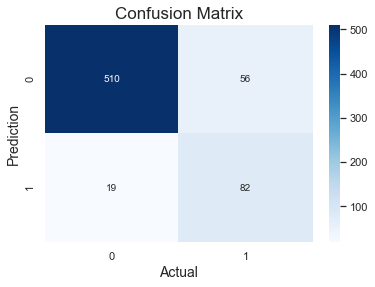

In [61]:
# Calculate the confusion matrix using true predicted labels
conf_matrix2 = confusion_matrix(y_test, y_test_pred_dt)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix2, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Prediction',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Decision tree model is performing slightly better that the baseline model however there appears to be some overfitting in the odel seeing as Test Accuracy score is 0.887 while Training Accuracy score is 1.0. To try and reduce this I opted to tune some hyperparameters in the model using GridSearchCV to try and improve the model.
 

In [78]:
# Define the hyperparameters and their respective values to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,11),
    'min_samples_split': range(2, 20, 2),
    'min_samples_leaf': range(1, 20, 2)
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Create the GridSearchCV object with cross-validation (adjust cv value as needed)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters found by GridSearch
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_dt_model = grid_search.best_estimator_
y_test_pred_dt2 = best_dt_model.predict(X_test_scaled)

# Evaluate the model with the best hyperparameters
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('F1 score:', f1_score(y_test, y_test_pred_dt2))
print('Recall score:', recall_score(y_test, y_test_pred_dt2))
print('Precision score:', precision_score(y_test, y_test_pred_dt2))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_dt2))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1 score: 0.7383177570093459
Recall score: 0.7821782178217822
Precision score: 0.6991150442477876
Accuracy score: 0.9160419790104948


In [79]:
print('Accuracy on training set', best_dt_model.score(X_train_resampled, y_train_resampled))


Accuracy on training set 0.9498686514886164


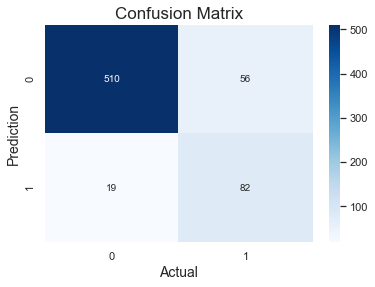

In [80]:
# Calculate the confusion matrix using true predicted labels
conf_matrix3 = confusion_matrix(y_test, y_test_pred_dt2)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix2, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Prediction',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [73]:
# Define the hyperparameters and their respective values to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,11),
    'min_samples_split': range(2, 20, 2),
    'min_samples_leaf': range(1, 20, 2)
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Create the GridSearchCV object with cross-validation (adjust cv value as needed)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearch
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_dt_model = grid_search.best_estimator_
y_test_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model with the best hyperparameters
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('F1 score:', f1_score(y_test, y_test_pred_dt))
print('Recall score:', recall_score(y_test, y_test_pred_dt))
print('Precision score:', precision_score(y_test, y_test_pred_dt))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_dt))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 4}
F1 score: 0.7872340425531914
Recall score: 0.7326732673267327
Precision score: 0.8505747126436781
Accuracy score: 0.9400299850074962


Model had a very long run time
Highest accuracy for training set 
Test accuracy during grid search was 0.908 / 90.854%


### 4. Random Forest

In [99]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = rf.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

# Calculate train and test scores
train_score = rf.score(X_train_scaled, y_train)
test_score = rf.score(X_test_scaled, y_test)

print("Train score:", train_score)
print("Test score:", test_score)

Accuracy: 0.9415292353823088
Precision: 0.803921568627451
Recall: 0.8118811881188119
F1-score: 0.8078817733990149
Train score: 1.0
Test score: 0.9415292353823088


In [ ]:
# hyperparameter tuning using GridSearchCV
params_rf = {'rf__n_estimators': range(400, 800, 200),
             'rf__criterion': ['gini', 'entropy'],
             'rf__max_depth': range(14, 20, 2),
             'rf__min_samples_split': range(3, 4, 7),
             'rf__min_samples_leaf': [5, 7, 12]
             
}

gridsearch_rf = GridSearchCV(pipe_rf, params_rf, cv=4, scoring='recall')
gridsearch_rf.fit(X_train_resampled, y_train_resampled)